# PLOTTING FIGURES AND SUBPLOTS

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## plot() on NUMPY objects

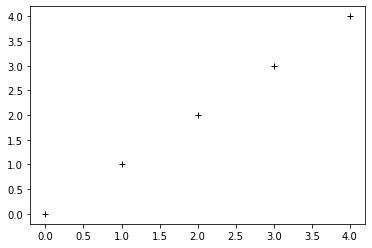

In [2]:
# A numpy object, called by matplotlib function 
plt.plot(np.arange(5), 'k+') 

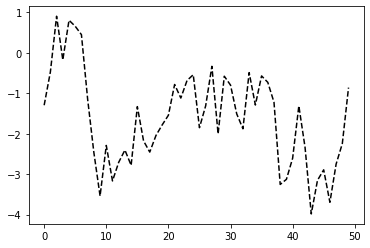

In [3]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

## add_subplot() on NUMPY objects

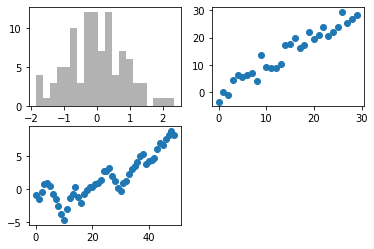

In [4]:
# plots exist within the figure object
fig = plt.figure()

# create a plot with subplots using add_subplot()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# all these should be in the same block where fig is executed
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.scatter(np.arange(50), np.random.randn(50).cumsum())

## subplots() on NUMPY objects

(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c2977d0>,
       dtype=object))

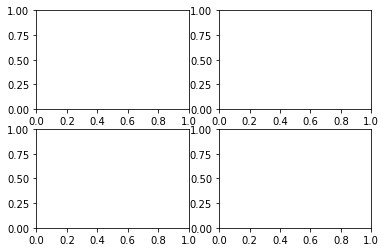

In [5]:
plt.subplots(2,2)

Text(0.5, 1.0, 'A single plot')

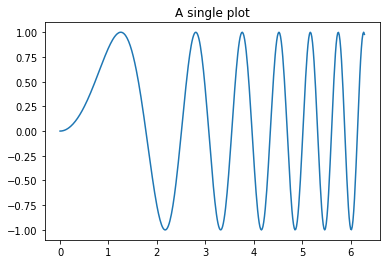

In [6]:
# Numpy objects
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Matplotlib objects
fig, ax = plt.subplots(1)

# Matplotlib object calls its plot() function on numpy objects x,y
ax.plot(x, y)
ax.set_title('A single plot')

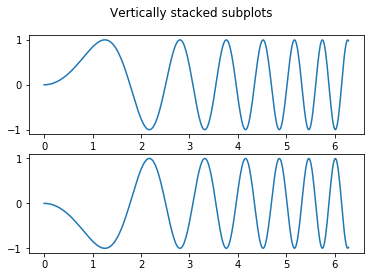

In [7]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y)

### Adjusting the spacing around subplots

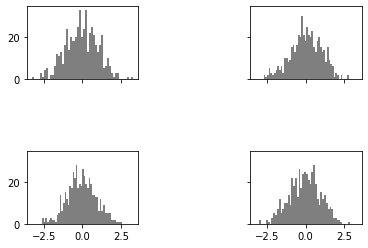

In [8]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=1, hspace=1)

In [9]:
plt.close('all')

## Colors, Markers, and Line Styles

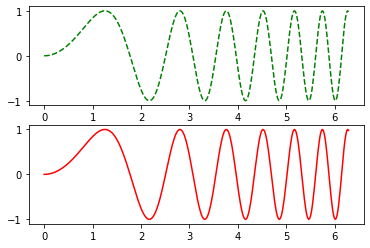

In [10]:
fig, axs = plt.subplots(2)
axs[0].plot(x, y, 'g--')
axs[1].plot(x, y, color='r', linestyle='-')

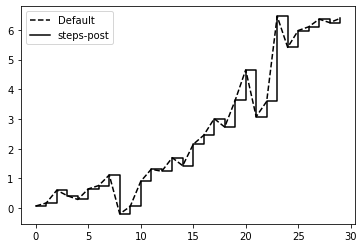

In [11]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

In [12]:
plt.close('all')

## Ticks, Labels, and Legends
### Setting the title, axis labels, ticks, and ticklabels

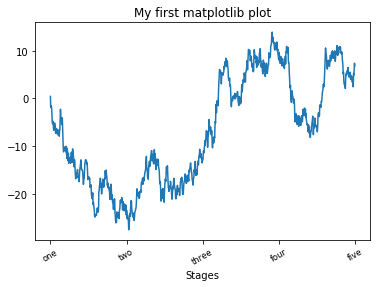

In [13]:
# Remember to run the figure object with all its settings at once
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

# Use a variable that holds the configuration. Unsure how to assign any add'l attributes
# props = {'title': 'My first matplotlib plot', 
#          'xlabel': 'Stages', 
#          'xticks': [0, 250, 500, 750, 1000],
#          'xticklabels': ['one', 'two', 'three', 'four', 'five']}     
# ax.set(**props)


## Adding legends

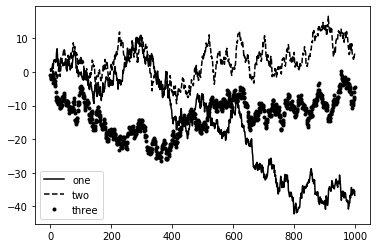

In [14]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

## Annotations and Drawing on a Subplot

(600, 1800)

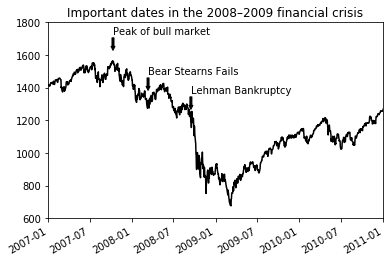

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('../examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX'] # a column

# object.plot()
ax.set_title('Important dates in the 2008–2009 financial crisis')
spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

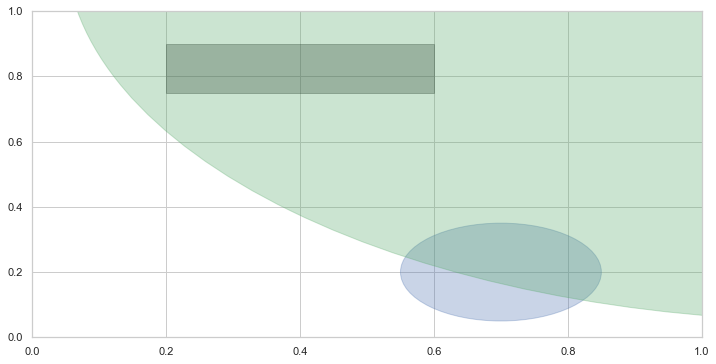

In [41]:
fig = plt.figure(figsize=(12, 6)); 
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3) 
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3) 
circ2 = plt.Circle((1.2, 1.2), 1.15, color='g', alpha=0.3) 

ax.add_patch(rect) 
ax.add_patch(circ)
ax.add_patch(circ2)

#Saving Plots to File
plt.savefig('../examples/figpath.png', dpi=400, bbox_inches='tight')


In [17]:
#Saving Plots to File
plt.savefig('../examples/figpath.png', dpi=400, bbox_inches='tight')


<Figure size 432x288 with 0 Axes>

In [18]:
plt.close('all')

## Plotting with pandas and seaborn
### Line Plots


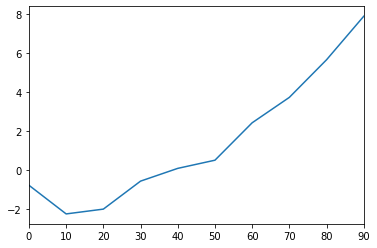

In [19]:
# Pandas object has plot() method
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

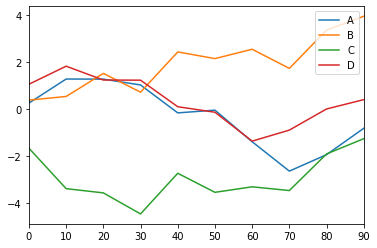

In [20]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar plots

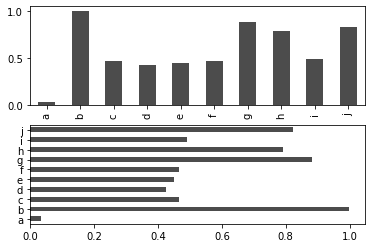

In [21]:
# Matplotlib for subplots
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.rand(10), index=list('abcdefghij'))

# Panda plot() uses subplot-axis from Matplotlib 
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [22]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.913267,0.177438,0.332599,0.179885
two,0.448366,0.243030,0.909508,0.890696
three,0.182099,0.424269,0.483252,0.299149
four,0.949560,0.768285,0.816613,0.007721
five,0.901554,0.003973,0.680738,0.930793
six,0.739580,0.062301,0.388957,0.666805


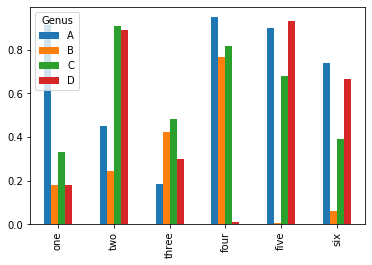

In [23]:
df.plot.bar()

In [24]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

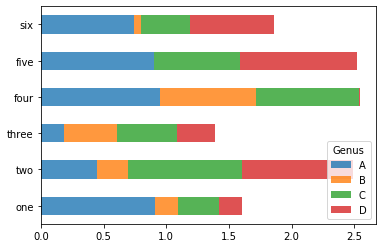

In [25]:
df.plot.barh(stacked=True, alpha=0.8)

In [26]:
plt.close('all')
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

### Seaborn

In [27]:
tips = pd.read_csv('../examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [28]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


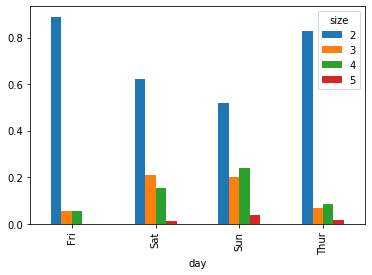

In [29]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

#### Seaborne starts here

In [30]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


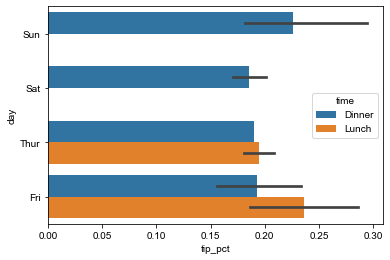

In [31]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
sns.set(style="whitegrid")

### Histograms and Density Plots

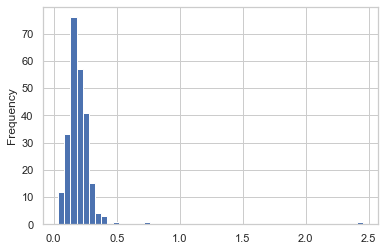

In [32]:
tips['tip_pct'].plot.hist(bins=50)

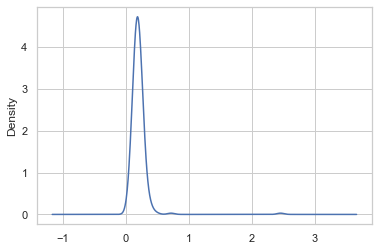

In [33]:
tips['tip_pct'].plot.density()

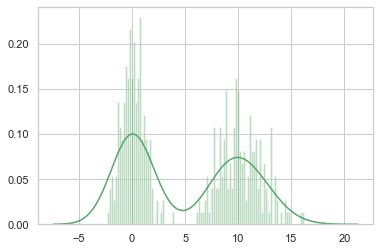

In [34]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='g')

### Scatter or Point Plots

In [35]:
macro = pd.read_csv('../examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

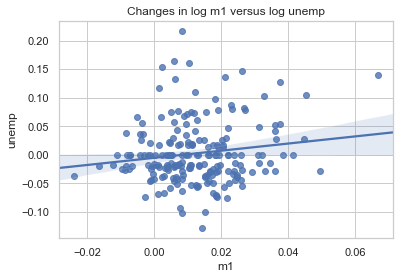

In [36]:

sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

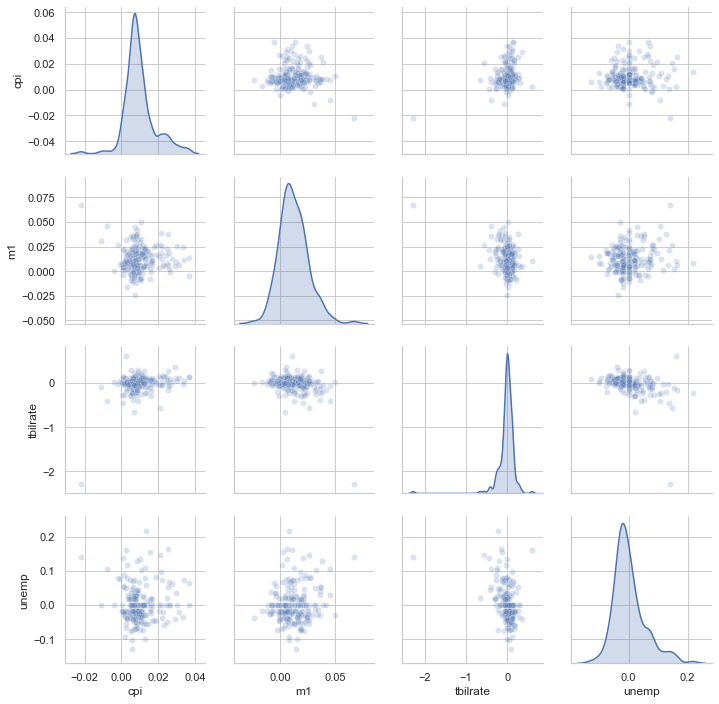

In [37]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet Grids and Categorical Data

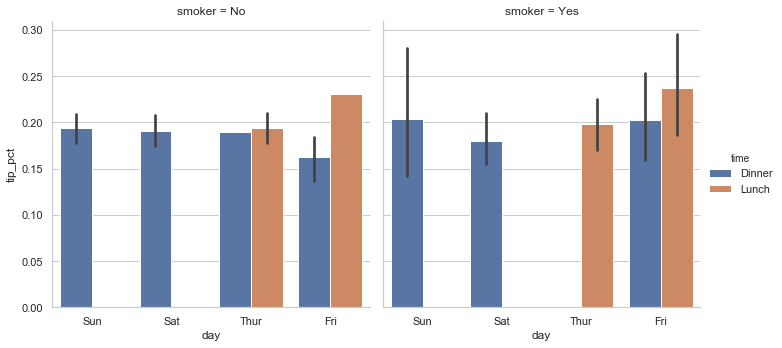

In [38]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

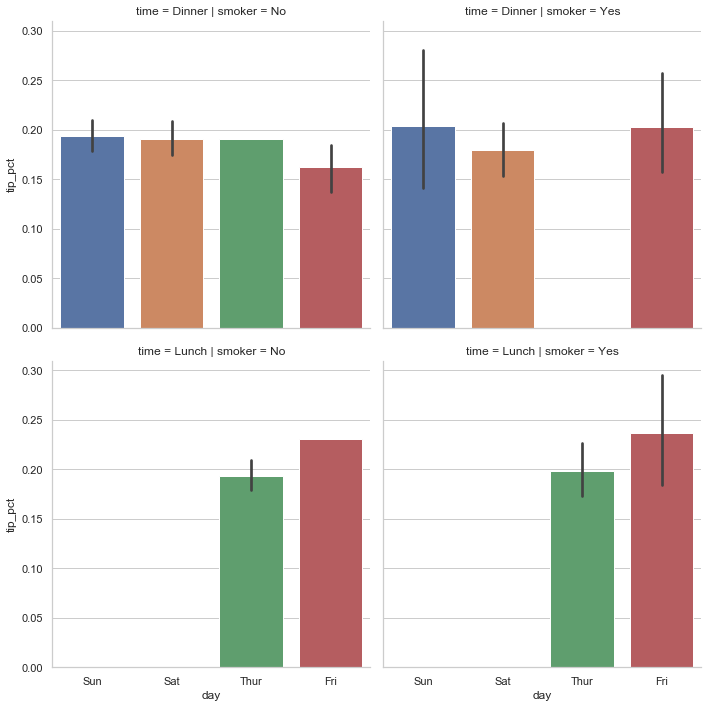

In [39]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

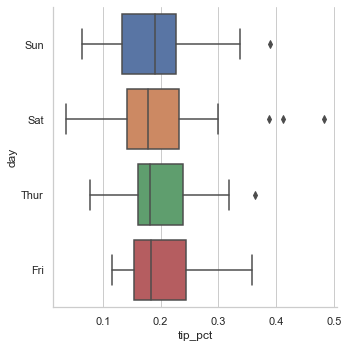

In [40]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)

ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')
#ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)
